# Was there a home court advantage in the basketball bubble?
-------------------------
<br>

**By the end of this notebook, you should be able to**: 
- Simulate the null hypothesis
- Visualize the results of the simulation
- Calculate and interpret a p-value
<br><br>


During the early days of the Covid-19 pandemic, the NBA tried to finish out the season by hosting 88 games at Disney World where players and staff were quarantined and tested regularly. They tried to recreate the atmosphere of a home court advantage for a team selected randomly as the "home" team for each game using virtual cheerleaders, fans and sounds from the team's real home court. 

If there was no home court advantage (the *null hypothesis*), we would expect the home team to win about 44 of the 88 games (50%). Suprisingly, the "home" team won 49 of the 88 games (56%). Does this suggest that there was a real home court advantage?

A data scientists approaches this problem in a unique way by asking the question:

**In a world where there is no home court advantage, what are the chances that the home teams wins 49 or more of the 88 games played?**

Let's try to answer this question.


<br>

<center><img src="../imgs/basketball.jpeg" alt="Drawing" style="width: 600px;"/> </td><center>





**Import the Pandas (`as pd`), Numpy (`as np`) and Matplotlib libraries**

In [11]:
import pandas as pd
import numpy as np

You will also seed a library called *Matplotlib* which uses a different import. Just run the following cell.

In [12]:
from matplotlib import pyplot as plt

## Simulating One Season

We approach this question assuming that the null hypothesis is true: **there was not a home court advantage**. In this world, there is no difference between playing at home or away -- the home team has a 50% chance of winning each game. Let's simulate one 88-game season in a world where there is no home court advantage.

**Create a variable called `number_games` and set it equal to 88.**

In [13]:
number_games = 88

**Create a list with only two items: `'win'` and `'loss'` and store it a variable called `result`**

In [14]:
result = ['win', 'loss']

**Convert the list `result` into a Numpy array and store it in a variable called `game`**

In [15]:
game = np.array(result)

Numpy has a function called `random.choice` which takes two arguments: a list that contains the possibilities it will randomly select from, and the number of times it will choose. This function will return a 1D array.

**Use the `random.choice` function to create an array of 88 'win' and 'loss' choices. Store the output array in a variable called `season`.**

In [16]:
season = np.random.choice(game, number_games)
print(season)

['loss' 'win' 'win' 'loss' 'win' 'win' 'loss' 'loss' 'loss' 'win' 'win'
 'loss' 'win' 'loss' 'win' 'win' 'loss' 'win' 'win' 'win' 'loss' 'loss'
 'win' 'win' 'win' 'loss' 'win' 'win' 'loss' 'win' 'loss' 'win' 'loss'
 'loss' 'win' 'loss' 'win' 'loss' 'win' 'win' 'loss' 'loss' 'win' 'win'
 'win' 'loss' 'loss' 'win' 'loss' 'loss' 'loss' 'win' 'loss' 'loss' 'loss'
 'loss' 'win' 'loss' 'loss' 'win' 'win' 'win' 'loss' 'win' 'win' 'win'
 'win' 'loss' 'loss' 'win' 'loss' 'win' 'win' 'loss' 'win' 'loss' 'win'
 'win' 'loss' 'win' 'loss' 'win' 'loss' 'win' 'loss' 'win' 'loss' 'win']


**Use the `count_nonzero` function in Numpy to count the number of `'wins'` in your simulation and store it in a variable called `home_team_wins`.**

In [17]:
home_team_wins = np.count_nonzero(season == 'win')
print(home_team_wins)

47


### Challenge Yourself

Define a function called `one_season` that returns the number of `'win'`'s.

#### Solution

```Python
def one_season():
    season = np.random.choice(game, number_games)
    home_team_wins = np.count_nonzero(season == 'win')
    return home_team_wins
```

## Visualizing the Data

We can visualize the results of our simulation using a **histogram** which divides the possible outcomes (the number of games won by the home team) into "bins". Each bin counts the number of seasons with a certain number of home team wins and represents it as a bar. It looks like a bar graph, but the key difference is that histograms chart quantitative (number) data, bar graphs chart categorical data (like months of the year).

**If you haven't already, define a function called `one_season` that returns the number of `'win'`'s. The code is in the** ***Solution*** **cell above.**

In [18]:
def one_season():
    season = np.random.choice(game, number_games)
    home_team_wins = np.count_nonzero(season == 'win')
    return home_team_wins

The following code will generate a histogram using the Matplotlib library. Before running the cell, read through the code to make sense of how you can make a visualization with Matplotlib.

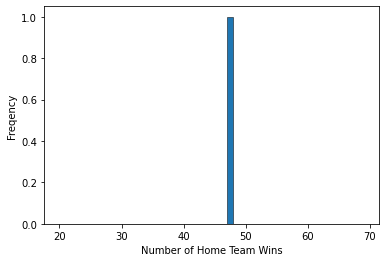

In [19]:
# Create the histogram from the results of running the one_season function:
plt.hist(one_season(), bins = np.arange(20, 70, 1), edgecolor='black', linewidth=0.5) # x-axis has range 20-70 and the width of a bin is 1
plt.xlabel('Number of Home Team Wins')
plt.ylabel('Freqency')
plt.show()

## Simulating Multiple Seasons

The above histogram isn't very helpful because it only shows the results of one season. Simulations are most useful when you run them many times.
We need to simulate the results of many seasons to get an idea of the probability of the home team winning a certain number of games, 49 in this case. The following code uses a `for loop` to run the simulation however many times we want. Change the code to simulate the following, ending with 10,000 seasons:

- 5 seasons
- 20 seasons
- 100 seasons
- 1,000 seasons
- 10,000 seasons

**Create a variable called `num_seasons` and set it equal to the desired number of seasons to simulate.**

In [20]:
num_seasons =  10000

**Run the following cell run the simulation.**

In [21]:
simulation = np.array([]) # empty list to hold results of each season

for i in np.arange(num_seasons):   # repeat the process num_seasons times
    new_value = one_season()  # simulate 88 games using the one_season function
    simulation = np.append(simulation, new_value) # add the new season to the list
    

**Run the following cell to plot the histogram.**

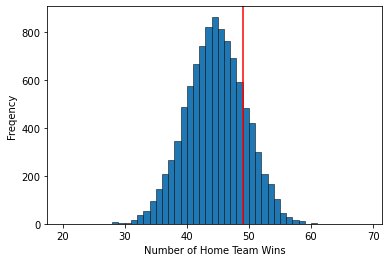

In [22]:
fig, ax = plt.subplots()    
plt.hist(simulation, np.arange(20, 70, 1), edgecolor='black', linewidth=0.5)
ax.axvline(49, color='r') # Draw a vertical line at 49 games (what was observed)
plt.xlabel('Number of Home Team Wins')
plt.ylabel('Freqency')
plt.show()

## What are the chances?

The histogram shows the result of 10,000 seasons played where there is no home court advantage. The red line shows what actually occurred in the NBA bubble. 

**Based on what you see in the histogram, does the home team winning 49 of the 88 games in a world where there is no home court advantage seem out of the ordinary?** 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/Canada_Stop_sign.svg/240px-Canada_Stop_sign.svg.png" alt="Drawing" align=left style="width: 60px;"/> 

### Analysis

As you have seen before, data scientists really like to express things in numbers as opposed to words. Therefore we need to answer our driving question with a number: 

**In a world where there is no home court advantage, what are the chances that the home teams wins 49 or more of the 88 games played?**

*In other words:* **What percentage of the simulated seasons had the home team winning 49 or more of the 88 games?**

Complete the following code to perform this calculation.

**Count the number of simulated seasons where the home team won 49 or more of the games and store it a variable named `count`. Remember, the variable `simulation` contains the number of `'win'`'s of each simulated season.**

In [23]:
count = np.count_nonzero(simulation >= 49)

**Calculate the percentage of simulated seasons where the home team had 49 or more wins using the following formula:**

$$ \%~seasons = {count \over number~of~seasons} \times 100\%$$

In [26]:
per_seasons = (count / num_seasons) * 100
print(per_seasons)

17.9


This value is important. It tell us the chances of the home team winning 49 or more games in a world where there is no home court advantage. Data scientists have a special name for this: the **p-value**. It can be expressed as a proportion, like `0.15` or a percentage like `15%`.

### How much is too much?

Remember, we are looking to see if there is enough evidence to **reject** the null hypothesis. The p-value you calculated is how often the home team is expected to win 49 or more games in an 88 game season **in a world where there is no home court advantage**. In order to reject the null hypoothesis, we need to determine if winning 49 games is out of the ordinary. In other words, is winning 49 games really that unusual in a world where there is no home court advantage?

**Based on your p-value, do you think there is enough evidence to reject the null hypothesis?** 

This notebook is based on an example originally developed by https://skewthescript.org/ (Lesson 7.4).
<img src = "../imgs/skew_the_script.png" alt="Drawing" align=left style="width: 200px;"/>